[Home](../README.md)

### Model Evaluation

This is a demonstration of evaluating a model.

Load the required dependencies.


In [2]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Multiple Variable Linear Regression

You should be able to understand the code snippets with less guidelines.

In [11]:
filename = 'my_saved_model_v2.sav'
model_C = pickle.load(open(filename, 'rb'))

In [12]:
mx_col = ['budget','score','release_quarter','votes', 'rating', 'year', 'is_sequel', 'country', 'runtime']
testing_data = pd.read_csv('testing_data.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['gross'])

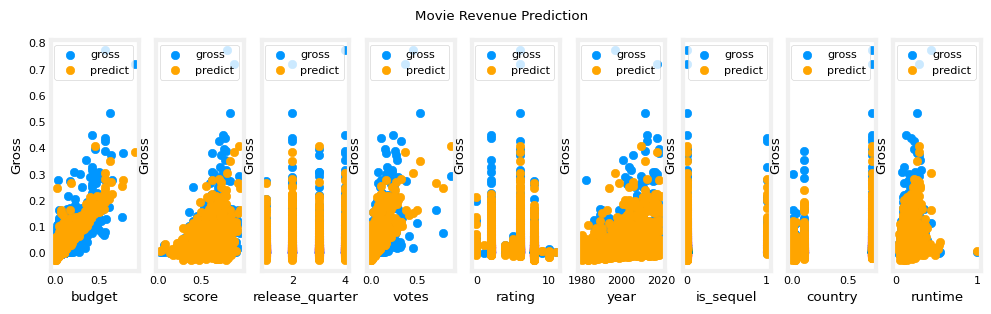

In [13]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'gross')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Gross"); ax[i].legend();
fig.suptitle("Movie Revenue Prediction")
plt.show()

In [14]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.6584617200311167


In [ ]:
#manual calculation of cost
print(model_C.predict([0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]))

ValueError: Expected 2D array, got 1D array instead:
array=[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

        budget     score  release_quarter  director_avg_gross  star_avg_score  \
0     0.044936  0.324324              4.0            0.005616        0.324324   
1     0.016846  0.675676              1.0            0.002880        0.675676   
2     0.100320  0.527027              2.0            0.027744        0.425676   
3     0.101116  0.662162              1.0            0.005482        0.662162   
4     0.056172  0.000000              3.0            0.021434        0.000000   
...        ...       ...              ...                 ...             ...   
1875  0.160105  0.648649              4.0            0.020390        0.564865   
1876  0.053363  0.716216              1.0            0.006238        0.686186   
1877  0.064599  0.554054              3.0            0.007111        0.621622   
1878  0.028082  0.513514              1.0            0.058964        0.513514   
1879  0.100320  0.527027              4.0            0.007980        0.496622   

      company_avg_gross    

In [7]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -0.0065856095776325
Coefficient: [ 1.56256069e-01  5.39171475e-03 -6.78380255e-05  8.17028944e-01
 -1.50173138e-02  3.84802297e-03  1.93431200e-01 -2.00017864e-04]
